In [1]:
import os
import numpy as np
np.random.seed(69)
import pandas as pd
import random
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
sns.set()
import tensorflow as tf
from tqdm.notebook import tqdm
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,concatenate, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, ZeroPadding2D, LeakyReLU, ReLU, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time

In [2]:
def get_metrics(y_pred, y_test, labels, to_print=True):
    correct_labels = np.where(y_pred==y_test)[0]
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred,average='macro')
    recall = metrics.recall_score(y_test, y_pred,average='macro')
    f1score = metrics.f1_score(y_test, y_pred,average='macro')
    # rocscore = metrics.roc_auc_score(y_test, y_pred,average='micro',multi_class="ovo")
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
    classification_report = metrics.classification_report(y_test, y_pred)

    if to_print:
        print("Identified {} correct labels out of {} labels".format(len(correct_labels), y_test.shape[0]))
        print("Accuracy:",accuracy)
        print("Precision:",precision)
        print("Recall:",recall)
        print("F1 Score:",f1score)
        # print("ROC AUC Score:",rocscore)
        print(f"Labels are: {labels}")
        print("Confusion Matrix:\n", confusion_matrix)
        print("Classification_Report:\n", classification_report)

    return (correct_labels, accuracy, precision, recall, confusion_matrix, classification_report)

In [3]:
dnnx_sg = np.load("../dataset/dnnx_sg.npy")
X_sg = np.load("../dataset/X_sg.npy")
y_sg = np.load("../dataset/y_sg.npy")

In [4]:
sgcnn = load_model("../../Experiment 1/Star-Galaxy/output/CNNClassifier.h5")
sgdnn = load_model("../../Experiment 1/Star-Galaxy/output/DNNClassifier.h5")
sgensemble = load_model("../../Experiment 1/Star-Galaxy/output/EnsembleClassifier.h5")

In [5]:
def print_preds(model, inp, y, mode):
    preds = model.predict(inp)
    if mode == "sg":
        lab = ['GALAXY', 'STAR']
    elif mode=="sgq":
        lab = ['GALAXY', 'QSO', 'STAR']
    
    print(get_metrics(preds.argmax(axis=1), y.argmax(axis=1),labels=lab))

# Star-Galaxy

In [6]:
print("DNN")
print_preds(sgdnn, dnnx_sg, y_sg, mode="sg")

595/595 [==============================] - 0s 581us/step
Identified 17421 correct labels out of 19022 labels
Accuracy: 0.9158342971296394
Precision: 0.9239886874747518
Recall: 0.9158342971296394
F1 Score: 0.9154276613619725
Labels are: ['GALAXY', 'STAR']
Confusion Matrix:
 [[9370  141]
 [1460 8051]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92      9511
           1       0.98      0.85      0.91      9511

    accuracy                           0.92     19022
   macro avg       0.92      0.92      0.92     19022
weighted avg       0.92      0.92      0.92     19022

(array([    0,     1,     2, ..., 19019, 19020, 19021]), 0.9158342971296394, 0.9239886874747518, 0.9158342971296394, array([[9370,  141],
       [1460, 8051]]), '              precision    recall  f1-score   support\n\n           0       0.87      0.99      0.92      9511\n           1       0.98      0.85      0.91      9511\n\n    accuracy     

In [7]:
print("CNN")
print_preds(sgcnn, X_sg, y_sg, mode="sg")

CNN
595/595 [==============================] - 88s 148ms/step
Identified 16986 correct labels out of 19022 labels
Accuracy: 0.8929660393228893
Precision: 0.903887521193596
Recall: 0.8929660393228893
F1 Score: 0.8922375408660068
Labels are: ['GALAXY', 'STAR']
Confusion Matrix:
 [[9275  236]
 [1800 7711]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      9511
           1       0.97      0.81      0.88      9511

    accuracy                           0.89     19022
   macro avg       0.90      0.89      0.89     19022
weighted avg       0.90      0.89      0.89     19022

(array([    1,     2,     3, ..., 19019, 19020, 19021]), 0.8929660393228893, 0.903887521193596, 0.8929660393228893, array([[9275,  236],
       [1800, 7711]]), '              precision    recall  f1-score   support\n\n           0       0.84      0.98      0.90      9511\n           1       0.97      0.81      0.88      9511\n\n    accuracy  

In [8]:
print("Ensemble")
print_preds(sgensemble, [X_sg, dnnx_sg], y_sg, mode="sg")

Ensemble
595/595 [==============================] - 96s 161ms/step
Identified 17491 correct labels out of 19022 labels
Accuracy: 0.9195142466617601
Precision: 0.9269239409209082
Recall: 0.9195142466617601
F1 Score: 0.9191634969642957
Labels are: ['GALAXY', 'STAR']
Confusion Matrix:
 [[9372  139]
 [1392 8119]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92      9511
           1       0.98      0.85      0.91      9511

    accuracy                           0.92     19022
   macro avg       0.93      0.92      0.92     19022
weighted avg       0.93      0.92      0.92     19022

(array([    0,     1,     2, ..., 19019, 19020, 19021]), 0.9195142466617601, 0.9269239409209082, 0.9195142466617601, array([[9372,  139],
       [1392, 8119]]), '              precision    recall  f1-score   support\n\n           0       0.87      0.99      0.92      9511\n           1       0.98      0.85      0.91      9511\n\n    acc

595/595 [==============================] - 132s 221ms/step


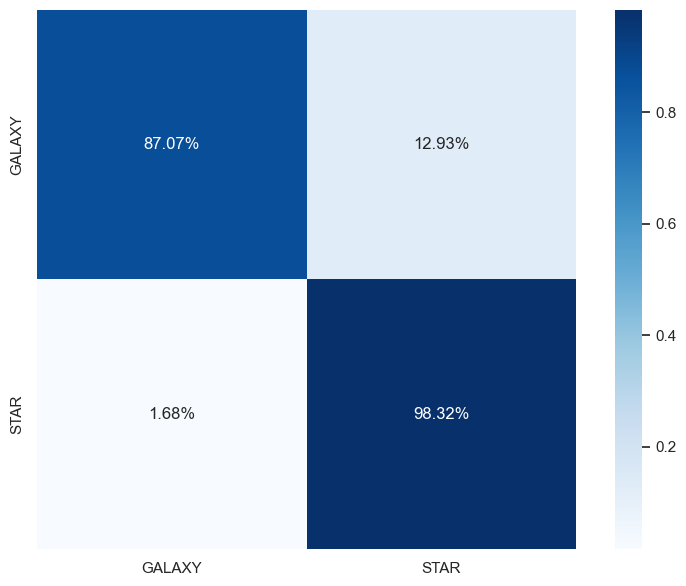

In [9]:
cm = metrics.confusion_matrix(sgensemble.predict([X_sg, dnnx_sg]).argmax(axis=1),
                              y_sg.argmax(axis=1),
                              normalize='true')
df_cm = pd.DataFrame(cm, index = ['GALAXY', 'STAR'],columns = ['GALAXY', 'STAR'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap="Blues",square=True,fmt='.2%')
plt.savefig("output/ensemble_cm_sg.pdf")